In [1]:
import os

import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt



# <a href="https://www.ibm.com/topics/inventory-management">Inventory Management Overview</a>
<br>
<font size="+1">
    <ul>
        <li>What is <i>inventory management</i>?</li>
        <br>
        <ul>
            <li>Inventory management is the process of learning how to <b>make decisions</b> regarding the <b>portfolio of products</b> that a company sells or manufactures, and the associated forecasting of the demand of those products.</li>
            <br>
            <li>The demands are influenced by a wide range of factors, and the demands are managed through the <b>creation of an optimal inventory policy that maximizes (or minimizes) some business-related objective.</b></li>
            <br>
            <font color="red"><li>A policy is a rule or algorithm that takes information and produces an action that is used to affect the state of a system.</li></font>
            <br>
        </ul>
        <li>Many companies, from retailers, to manufacturers, to warehouses, to market makers, to cloud computing service providers, etc. have to deal with the random demand of products.</li>
        <br>
        <li>The simple scenario is as follows:</li>
        <br>
        <ul>
            <li>Assume you are managing a particular item.</li>
            <br>
            <li>The item is important enough to your revenue that you want to carry enough inventory to avoid stocking out (running out of inventory).</li>
            <br>
            <li>The item is expensive enough that you also want to minimize the amount of cash tied up in inventory.</li>
            <br>
            <li>The process of ordering replenishment stock is sufficiently expensive and cumbersome that you also want to minimize the number of purchase orders you create.</li>
            <br>
            <li>You want to estimate future demand for the product, but it appears to be random, and full of noise and bias.</li>
            <br>
            <li>Additionally, the replenishment lead time between when you detect the need for more inventory and when it arrives on your shelf is also random.</li>
            <br>
            <li>You are tasked with the management of this item, which means deciding when to order more inventory and at what quantity to order.</li>
            <br>
        </ul>
    </ul>
</font>
<br>
$\rule{800pt}{20pt}$

## Inventory Management with Custom (Non-Fungible) Products
<br>
<font size="+1">
    <ul>
        <li>Imagine you are working at a company that distributes a highly customized product, and the demand for this product is therefore <b>unique</b> to every customer.</li>
        <br>
        <li>Examples of firms that incorporate customization into their products include</li>
        <br>
        <ul>
            <li><a href="https://www.nike.com/nike-by-you">Nike</a> - with their customized shoes,</li>
            <br>
            <li><a href="https://www.nissanusa.com/">Nissan</a> - with their options for buyers to choose an engine model, interior and exterior vehicle color, etc., </li>
            <br>
            <li><a href="https://www.bluesky.com/">Blue Sky</a> - with their exclusive premium and personalized planners, allowing customers to upload their own images or choose from a gallery, as well as customization of the name, frame style, color, fonts, interior colors and formats, etc.,</li>
            <br>
            <li><a href="https://www.nutella.com/us/en/">Nutella</a> - with their ability to have customers add their name to a jar,</li>
            <br>
            <li><a href="https://www.solidsurface.com/">Solid Surface</a> - with customers being able to add faucet hole locations to sinks, as well as all sorts of other decorative surfacing choices.</li>
            <br>
        </ul>
        <li>There are <a href="https://sloanreview.mit.edu/article/customizing-customization/">many reasons to explain the shift</a> from mass production and distribution of standardized products to the customization of products including</li>
        <br>
        <ul>
            <li>to compete with smaller companies who are taking customers through innovations in selling products on the internet,</li>
            <br>
            <li>advances in software that allows end-users to personalize product color, functionalities, and add-on features all from a company's website,</li>
            <br>
            <li>and in order to increase brand loyalty.</li>
            <br>
            <li>Note that many industry experts view mass customization as the future of retailing. The <a href="https://academic.oup.com/jcr/article/46/4/750/5490200">customization literature</a> has shown that customizing products yields many benefits for marketers, such as higher willingness to pay (WTP), increased purchase intentions, and more positive attitudes toward the product.</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

## Inventory Review Policies
<br>
<font size="+1">
    <ul>
        <li>A policy is a rule or algorithm that takes information (measurements of the state of a system),</li>
        <br>
        <ul>
            <li>such as current product level,</li>
            <br>
            <li>estimated time to fulfill an order (lead time),</li>
            <br>
            <li>forecasts of future demand,</li>
            <br>
            <li>etc.,</li>
            <br>
        </ul>
        <li>and produces an action,</li>
        <br>
        <ul>
            <li>such as when to buy a product,</li>
            <br>
            <li>at what price,</li>
            <br>
            <li>in what quantity,</li>
            <br>
            <li>etc.,</li>
            <br>
        </ul>
        <li>that is used to affect the state of a system,</li>
        <br>
        <ul>
            <li>such as the current or future invtory level of a product.</li>
            <br>
        </ul>
        <li>We will consider periodic review policies and continuous review policies.</li>
        <br>
    </ul>
</font>

$\square$

### Periodic Review
<br>
<br>
<img src="https://i.ytimg.com/vi/P0-C-KIfywM/maxresdefault.jpg" width="600" height="400">
<br>
<br>
<font size="+1">
    <ul>
        <li>The periodic review model is one of the inventory policies that reviews physical inventory at specific intervals of time and orders the quantity that fills the current inventory up to the maximum level of inventory.</li>
        <br>
        <li>The <b>safety stock of periodic review model is larger than that of continuous review model</b> because the inventory manager is checking inventory less frequently.</li>
        <br>
        <li>In other words, </li>
        <br>
        <ul>
            <li>orders are placed like clockwork every $T$ days, which is helpful for companies that cannot keep track of their inventory level in real time, or who prefer to issue orders to suppliers at scheduled intervals,</li>
            <br>
            <li>and inventory levels are measured and the gap between the current level measured and the maximum level of inventory is ordered.</li>
            <br>
        </ul>
        <font color="blue"><li style="color:blue">This is a fairly simple policy to implement, but it is the least flexible in responding to fluctuations in demand or lead time.</li>
        <br>
        <li style="color:blue">Also, note that while the order size would be adequate to return the inventory level to the maximum inventory if replenishment were immediate. In practice, however, there is a replenishment delay during which the inventory will continue to drop, so the inventory level will rarely reach the maximum level.</li></font>
        <br>
        <li>For more on periodic review of inventory, see</li>
        <br>
        <ul>
            <li><a href="https://www.cscjournals.org/manuscript/Journals/IJBRM/Volume5/Issue3/IJBRM-166.pdf">Periodic Review Model for Determining Inventory Policy for Aircraft Consumable Spare Parts</a></li>
            <br>
            <li><a href="https://www.gsb.stanford.edu/faculty-research/working-papers/inventory-policies-periodic-review-systems">Inventory Policies for Periodic Review Systems</a></li>
            <br>
        </ul>
        <font color="red"><li style="color:red">We can also think of this periodic review policy as a fixed time and random quantity policy.</li></font>
    </ul>
</font>

$\square$

### Continuous Review
<br>
<br>
<img src="https://www.researchgate.net/publication/316702594/figure/fig2/AS:495764427034624@1495210858444/Fixed-quantity-review-system-continuous-review.png">
<br>
<br>
<font size="+1">
    <ul>
        <li>A continuous inventory review policy is one in which the inventory levels are monitored continuously and inventory replenishments may be ordered at any time.</li>
        <br>
        <li>In other words,</li>
        <br>
        <ul>
            <li>orders are placed as soon as the inventory drops to, or below, some reorder point,</li>
            <br>
            <li>and the order size is always fixed at some quantity.</li>
            <br>
        </ul>
        <font color="blue"><li style="color:blue">The continuous review policy is more responsive than the periodic review policy because it reacts more quickly to signs of imminent stockout.</li>
        <br>
        <li style="color:blue">Often times, the fixed order quantity isn't up to the inventory manager, but rather decided by suppliers that have terms that restrict quantities a purchaser can buy.</li>
        <br></font>
        <li>For more on periodic review of inventory, see</li>
        <br>
        <ul>
            <li><a href="https://pubsonline.informs.org/doi/abs/10.1287/opre.2016.1538">Continuous-Review $(R, nQ)$ Policies for Inventory Systems with Dual Delivery Modes</a></li>
            <br>
            <li><a href="https://www.sciencedirect.com/science/article/abs/pii/S0927050705801847#:~:text=This%20chapter%20deals%20with%20continuous,of%20time%20when%20demands%20occur.">Continuous review policies for multi-level inventory systems with stochastic demand</a></li>
            <br>
            <li>Under certain conditions (if the demand is Poisson or compound Poisson) it can be shown that it is sufficient to consider those moments of time when demands occur.</li>
            <br>
            <li>In case of low demand, there are relatively few such events, and it is usually suitable to apply continuous review policies.</li>
            <br>
            <li>On the other hand, in case of very high demand, continuous review can lead to high information costs and it may be more practical to review the inventory system periodically.</li>
            <br>
            <li>This means that continuous review policies are of special interest for inventory items that naturally have a low demand — for example, spare parts.</li>
            <br>
        </ul>
        <font color="red"><li style="color:red">We can also think of this continuous review policy as a random time and fixed quantity policy.</li></font>
    </ul>
</font>

$\square$

## What Needs to be Measured, Estimated, or Forecasted?
<br>
<font size="+1">
    <ul>
        <li>In the process of crafting an inventory management policy, one needs to provide information (measurements or estimates) on the current state of the system, as well as estimates or forecasts of future states of the system.</li>
        <br>
        <li>These variables include</li>
        <br>
        <ul>
            <li>lead time,</li>
            <br>
            <li>future demand,</li>
            <br>
            <li>inventory operating costs,</li>
            <br>
            <li>etc.</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

### <a href="https://en.wikipedia.org/wiki/Lead_time">Lead Time</a>
<br>
<br>
<img src="https://www.agilesherpas.com/hubfs/Google%20Drive%20Integration/The%20Crucial%20Role%20of%20Lead%20Time%20in%20Improving%20Marketing%20Efficiency-1.jpeg" height="200" width="600">
<br>
<br>
<font size="+1">
    <ul>
        <li>When anyone buys a product, it takes some amount of time for the product to get to you.</li>
        <br>
        <li>This measured quantity is known as a <i>lead time</i>.</li>
        <br>
        <ul>
            <li><i>Lead time</i> is a term borrowed from the manufacturing method known as Lean or Toyota Production System, where it is defined as the time elapsed between a customer placing an order and receiving the product ordered.</li>
            <br>
            <li>That is, lead time is the time to completion of an order.</li>
            <br>
            <li>Every business has a lead time, and the interpretation of this lead time differs in each field depending on the nature of operations.</li>
            <br>
        </ul>
        <font color="blue"><li style="color:blue">In other words, a lead time is the <b>latency</b> between the initiation and completion of a process.</li></font>
        <br>
        <li>There a number of different factors that will impact how long you wait, i.e. the lead time.</li>
        <br>
        <li>These factors include</li>
        <br>
        <ul>
            <li>transportation time,</li>
            <br>
            <li>review period (time spent between two different orders),</li>
            <br>
            <li>production frequency,</li>
            <br>
            <li>production time,</li>
            <br>
            <li>planning time,</li>
            <br>
            <li>preparation time,</li>
            <br>
            <li>idiosyncratic time, which is the time it takes to deal with unexpected events - goods can be stolen, a storm can delay transportation, a global pandemic,</li>
            <br>
            <li>etc.</li>
            <br>
        </ul>
        <li>These factors cause the lead time to be a random number and have variability.</li>
        <br>
        <li>For more on stochastic lead times, see</li>
        <br>
        <ul>
            <li><a href="https://www.jstor.org/stable/24540950">Inventory Management with Stochastic Lead Times</a></li>
            <br>
            <li><a href="https://www.csa.iisc.ac.in/~nv/12stochasticleadtimenvmrs.PDF">Stochastic Lead Time Models for Supply Chain Networks</a></li>
            <br>
        </ul>
    </ul>
</font>

$\square$

### Demand
<br>
<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*Zr1H_-UPF2-PRZAzA0ql7A.png" height="400" width="900">
<br>
<br>
<font size="+1">
    <ul>
        <li>The quantity that customers want to purchase for a particular product, known as demand, will vary over time.</li>
        <br>
        <li>Demand is a highly useful input variable to effectively manage a portfolio of product inventory.</li>
        <br>
        <li>It is unlikely you will receive the same order quantity for the products every day.</li>
        <br>
        <li>Some products may vary due to seasonality, while others may have <b>latent trends</b>.</li>
        <br>
        <li>Therefore, the demand varies randomly, i.e. <a href="http://www.columbia.edu/~gmg2/4000/pdfold/lect10.pdf">demand is stochastic.</a></li>
        <br>
        <li>Because future demand is uncertain, a certain level of stock is typically retained in order to hedge the risk of a stockout, i.e. the event when inventory is exhausted. This level of inventory is known as <a href="https://en.wikipedia.org/wiki/Safety_stock">safety stock</a>.</li>
        <br>
        <font color="red"><li style="color:red">Given this uncertain demand, we want to use simulations to generate demand time series for the different products in order to determine how to best manage inventory and make an expected profit.</li></font>
        <br>
        <li>To see how large swings in demand forecasts can create supply chain inefficiencies in a distribution channel, read about the <a href="https://en.wikipedia.org/wiki/Bullwhip_effect">bullwhip effect</a>.</li>
    </ul>
</font>

$\square$

### Inventory Operating Costs
<br>
<br>
<img src="https://www.mbaskool.com/2015_images/stories/nov-images/mans-invtcost.jpg">
<br>
<br>
<font size="+1">
    <ul>
        <li>Managing inventory levels is not without costs, in particular, costs can generally be decomposed into</li>
        <br>
        <ul>
            <li><a href="https://en.wikipedia.org/wiki/Carrying_cost">holding or carrying costs</a> are the costs that include warehousing costs such as rent, utilities, and salaries, as well as costs related to perishability or insurance.</li>
            <br>
            <li><a href="https://www.accountingtools.com/articles/ordering-costs.html">ordering costs</a> are the costs incurred to create and process a purchase order to a supplier,</li>
            <br>
            <li>and <a href="https://www.accountingtools.com/articles/shortage-costs#:~:text=Shortage%20costs%20are%20those%20costs,that%20are%20not%20in%20stock.">shortage costs</a>, which include the opportunity cost incurred when you either lose a sale or force a customer to wait for what they want.</li>
            <br>
        </ul>
        <li>These costs can be very hard to accurately estimate, and are often ignored for a first approximation, however they make a large difference in the long run management of inventory.</li>
        <br>
    </ul>
</font>


$\square$

## What's the Objective?
<br>
<br>
<p style="text-align:center">Profit as a function of order quantity and reorder frequency.</p>
<img src="https://en-academic.com/pictures/enwiki/77/MaximumParaboloid.png" height="200" width="500">
<br>
<br>
<font size="+1">
    <ul>
        <li>An objective is a goal that one wishes to achieve.</li>
        <br>
        <li>Often times, there are many constraints on the decisions one can make in order to achieve the goal.</li>
        <br>
        <li>An optimal decision can vary significantly depending on the constraints.</li>
        <br>
        <li>A common objective is to maximize the expected profit of a product through effective inventory management, subject to cost constraints.</li>
        <br>
        <li>This is where lots of mathematical modeling comes in, as equations typically need to be written down to tell us, precisely, what objective needs to be maximized or minimized.</li>
        <br>
    </ul>
</font>

$\square$

# Inventory Managment Simulation
<br>
<font size="+1">
    <ul>
        <li>Recall, a simulation is the imitation of the operation of a real-world process or system over time.</li>
        <br>
        <li>For this example, we will be <b>simulating demand</b> for four different customizable products and investigating the behavior of different <b>inventory policies</b> in order to determine which policy best maximizes the <b>expected future profit</b> objective.</li>
        <br>
    </ul>
</font>

## Initialization of Our System
<br>
<font size="+1">
    <ul>
        <li>In order to analyze the inventory system, we first need to have some idea about the supply/demand behavior of the four products.</li>
        <br>
        <li>This will allow us to make some assumptions about how our variables behave, and subsequently start to build the simulation.</li>
        <br>
        <li>Typically, these values would be inferred from data and this step requires a lot of exploratory data analysis (EDA), also known as <b>descriptive analytics</b>.</li>
        <br>
        <li><p style="text-align:center">Product Data</p>
            <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Product</th>
      <th>Lead Time (days)</th>
      <th>Volume ($m^3$)</th>
      <th>Cost ($\$$)</th>
      <th>Selling Price ($\$$)</th>
      <th>Initial Inventory ($Q$)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>9</td>
      <td>0.57</td>
      <td>12</td>
      <td>16.1</td>
      <td>2750</td>
    </tr>
    <tr>
      <th>2</th>
      <td>6</td>
      <td>0.052</td>
      <td>7</td>
      <td>8.6</td>
      <td>22500</td>
    </tr>
    <tr>
      <th>3</th>
      <td>16</td>
      <td>0.53</td>
      <td>6</td>
      <td>10.2</td>
      <td>5200</td>
    </tr>
    <tr>
      <th>4</th>
      <td>22</td>
      <td>1.05</td>
      <td>37</td>
      <td>68</td>
      <td>1400</td>
    </tr>
  </tbody>
</table></li>
        <br>
        <br>
        <li>In the above table, </li>
        <br>
        <ul>
            <li>the lead time is a factor that influences policy design due to the worry of demand over lead times and the risk of stockouts,</li>
            <br>
            <li>the physical volume of a product could be a proxy for storage costs,</li>
            <br>
            <li>the supplier's cost of a product could be a proxy for ordering costs,</li>
            <br>
            <li>and the selling price could be a proxy for opportunity cost if there is a stockout.</li>
            <br>
        </ul>
        <br>
        <br>
        <li>Based on data from the past year of sales, we can observe the empirical distribution (histogram) of the demand for each product.</li>
        <br>
        <br>
        <li><img src="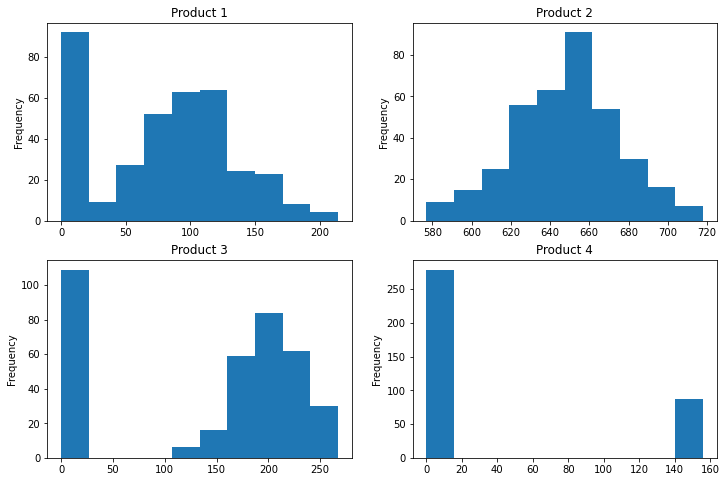
"></li>
<br>
<br>
        <li>From the above demand histograms, we can make a few observations</li>
        <br>
        <ul>
            <li>Every product <b>except</b> product $2$ has days where there is no demand.</li>
            <br>
            <li>Product $2$ seems to be a high volume product that gets bought every day, it also has the lowest selling price.</li>
            <br>
            <li>Product $4$, which is the highest selling price product, appears to have the largest number of days without demand, and when it does sell it has a fair amount of volume.</li>
            <br>
            <li>Product $1$ and $3$ appear to have a somewhat bi-modal distribution, product $3$ more so, and one hypothesis could be this bi-modallity is due to a cyclical or seasonal pattern in demand.</li>
            <br>
            <font color="red"><li style="color:red">What else?</li></font>
            <br>
        </ul>
        <br>
        <br>
        <li>We can calculate specific values from these distributions that will be useful for parameter estimation in our simulation.</li>
        <br>
        <li><p style="text-align:center">Summary Statistics of Product Sales Data</p>
        <table border="1" class="dataframe">
  <thead>
    <tr style="text-align:right">
      <th></th>
      <th>Product 1</th>
      <th>Product 2</th>
      <th>Product 3</th>
      <th>Product 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Mean (Order Size | Order Received)</th>
      <td>103.5</td>
      <td>648.55</td>
      <td>201.68</td>
      <td>150.07</td>
    </tr>
    <tr>
      <th>Std Dev (Order Size | Order Received)</th>
      <td>37.32</td>
      <td>26.45</td>
      <td>31.08</td>
      <td>3.22</td>
    </tr>
    <tr>
      <th>Probability of Order Received</th>
      <td>0.76</td>
      <td>1.00</td>
      <td>0.70</td>
      <td>0.24</td>
    </tr>
    <tr>
      <th>Expected Demand During Lead Time (Average Order Size)</th>
      <td>705</td>
      <td>3891.31</td>
      <td>2265.84</td>
      <td>784.79</td>
    </tr>
    <tr>
      <th>Expected Std Dev of Demand During Lead Time (Variation of Order Size)</th>
      <td>165.01</td>
      <td>64.78</td>
      <td>383.33</td>
      <td>299.72</td>
    </tr>
  </tbody>
</table></li>
<br>
<br>
<font color="red"><li style="color:red">What can we observe about the products from the table?</li></font>
<br>
<br>
<li>The above table provides estimates for the following summary statistics (unless otherwise stated, the quantities are in daily units)
<br>
$$\mathbb{E}\left[\text{Order Size} \ \big| \ \text{Order Received}\right],$$
<br>
$$\sqrt{\mathbb{V}\left[\text{Order Size} \ \big| \ \text{Order Received}\right]},$$
<br>
$$\mathbb{P}\left[\text{Order Received}\right],$$
<br>
$$\mathbb{E}\left[\text{Order Size During Lead Time}\right] \approx \text{LeadTime }\times \mathbb{E}\left[\text{Order Size}\right],$$
<br>
$$\sqrt{\mathbb{V}\left[\text{Order Size During Lead Time}\right]} \approx \sqrt{\text{LeadTime }} \times \sqrt{\mathbb{V}\left[\text{Order Size}\right]}.$$
<br></li>
<br>
<br>
<li>It is important to understand the statistics of demand during lead time in order to set policies for reordering inventory that <b>minimize the risk of stockout</b> during lead times, and might give some insight into how to hedge stockout risk with safety stock.</li>
<br>
<ul>
<li>As an example, consider the expected demand during the $9$ day lead time for product $1$. This means in those $9$ days that the distributor is waiting for their product to arrive, they can expect an average of $705$ orders.</li>
<br>
<li>This needs to be taken into consideration while placing the original order, otherwise the distributor can fall short of meeting the future demand.</li>
<br>
</ul>
    </ul>
</font>

$\square$

### Descriptive Analytics of Products
<br>
<font size="+1">
    <ul>
        <li>We will briefly investigate how to reproduce the above tables and charts given some data.</li>
        <br>
        <font color="red"><li style="color:red">If you want to learn more fundamentals of Pandas, see the auxillary notebooks in the class drive.</li></font>
        <br>
    </ul>
</font>

In [5]:
##########################################
# Imports
##########################################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read in the summary stats data frame which summarizes many of the above tables

pd.read_csv(os.path.join(data_path, 'summary_stats.csv'))

NameError: ignored

In [ ]:
# Read in the sales history data set and skip the header rows

product_demand_history = pd.read_excel(os.path.join(data_path, 'XYZ-1.xlsx'), skiprows=[1,2,3,4,5,6])

product_demand_history.head()

,Product,1,2,3,4
0,0,90,610,204,153
1,1,94,685,244,147
2,2,0,649,197,0
3,3,110,667,0,0
4,4,106,663,228,0


<Axes: title={'center': 'Product 4'}, ylabel='Frequency'>

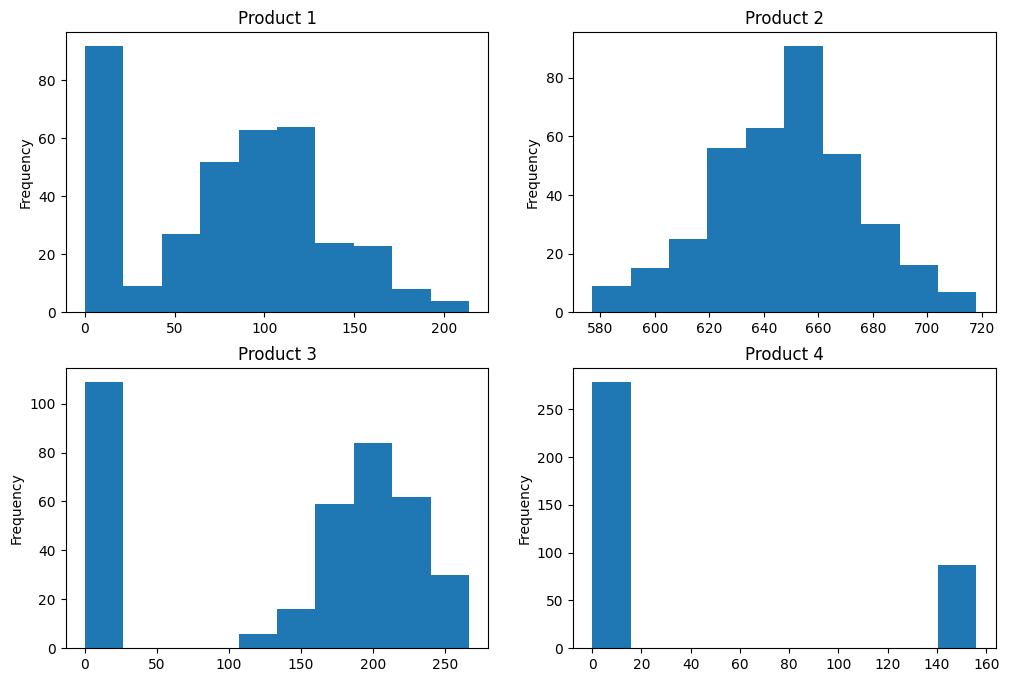

In [ ]:
# Plot the demand histogram in a subplot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

product_demand_history.iloc[:,1].plot(kind='hist',ax=axes[0, 0], title="Product 1")
product_demand_history.iloc[:,2].plot(kind='hist',ax=axes[0, 1], title="Product 2")
product_demand_history.iloc[:,3].plot(kind='hist',ax=axes[1, 0], title="Product 3")
product_demand_history.iloc[:,4].plot(kind='hist',ax=axes[1, 1], title="Product 4")

<Axes: title={'center': 'Product 4'}, ylabel='Frequency'>

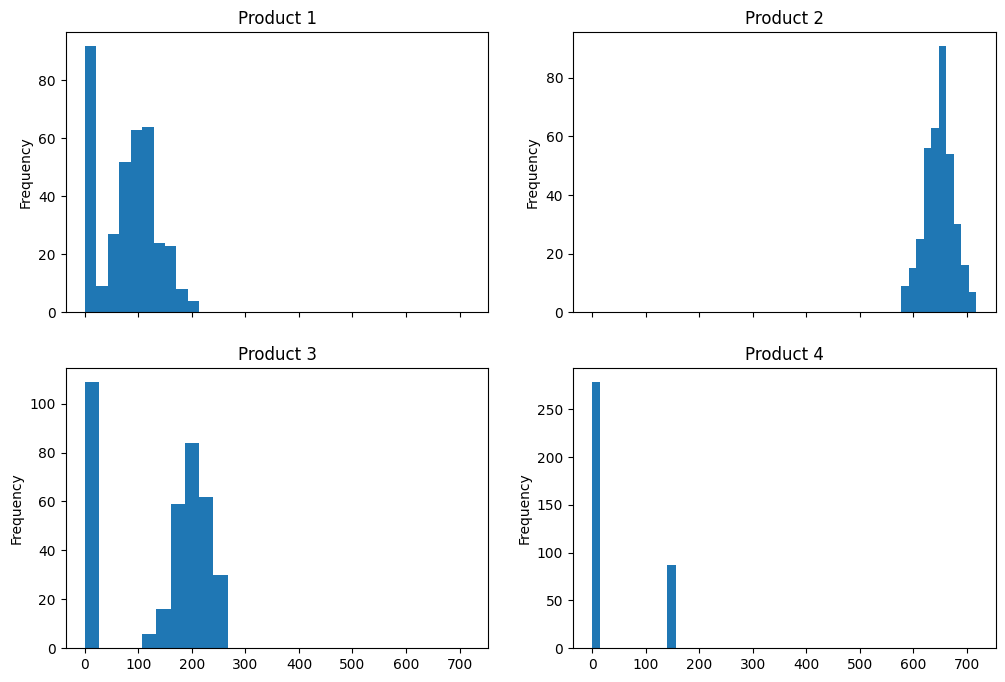

In [ ]:
# Plot the demand histogram in a subplot with the same x-axis to compare levels of demand

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

product_demand_history.iloc[:,1].plot(kind='hist',ax=axes[0, 0], title="Product 1")
product_demand_history.iloc[:,2].plot(kind='hist',ax=axes[0, 1], title="Product 2")
product_demand_history.iloc[:,3].plot(kind='hist',ax=axes[1, 0], title="Product 3")
product_demand_history.iloc[:,4].plot(kind='hist',ax=axes[1, 1], title="Product 4")

<Axes: ylabel='Frequency'>

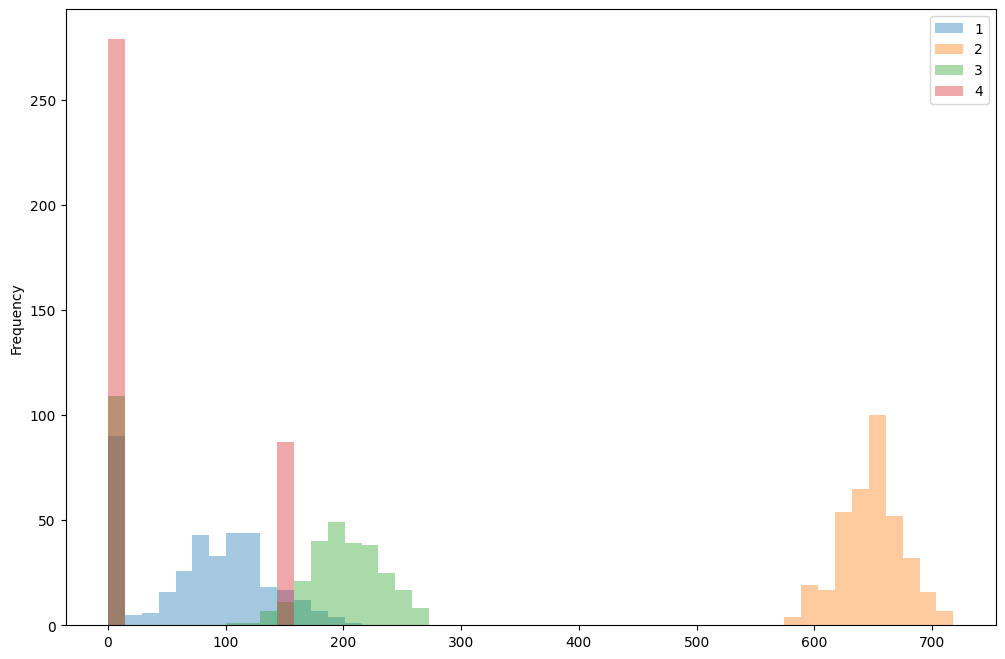

In [ ]:
# Plot the demand histogram in a single plot for demand comparison between products

product_demand_history.iloc[:, 1:].plot(kind='hist', bins=50, alpha=0.4, figsize=(12,8))

In [ ]:
# for col in range(1,product_demand_history.shape[1]):
#     product_demand_history.iloc[:, col].plot(kind='hist', title='Product {}'.format(col))
#     plt.show()

In [ ]:
# Changing the row index to be the day number

product_demand_history.set_index('Product', inplace=True)
product_demand_history.sort_index(inplace=True)

product_demand_history.head()

,1,2,3,4
Product,,,,
0,90,610,204,153
1,94,685,244,147
2,0,649,197,0
3,110,667,0,0
4,106,663,228,0


In [ ]:
# Unconditional summary statistics

product_demand_history.describe()

,1,2,3,4
count,366.000000,366.000000,366.000000,366.000000
mean,78.333333,648.551913,141.614754,35.672131
std,55.080000,26.483001,95.964187,63.987684
min,0.000000,577.000000,0.000000,0.000000
25%,18.000000,631.000000,0.000000,0.000000
50%,86.000000,650.000000,182.000000,0.000000
75%,119.500000,664.000000,214.500000,0.000000
max,214.000000,718.000000,267.000000,156.000000


In [ ]:
# Conditional summary statistics

product_demand_history[product_demand_history>0].describe()

,1,2,3,4
count,277.000000,366.000000,257.000000,87.000000
mean,103.501805,648.551913,201.677043,150.068966
std,37.385538,26.483001,31.139943,3.234239
min,10.000000,577.000000,110.000000,144.000000
25%,76.000000,631.000000,181.000000,147.000000
50%,102.000000,650.000000,201.000000,150.000000
75%,126.000000,664.000000,223.000000,153.000000
max,214.000000,718.000000,267.000000,156.000000


In [ ]:
# Average daily order size conditional on an order being placed

product_demand_history[product_demand_history>0].mean()

1    103.501805
2    648.551913
3    201.677043
4    150.068966
dtype: float64

In [ ]:
# Standard Deviation of daily order size conditional on an order being placed

product_demand_history[product_demand_history>0].std()

1    37.385538
2    26.483001
3    31.139943
4     3.234239
dtype: float64

In [ ]:
# Average proportion of days that there is an order placed
# i.e. Probability of an order being placed on any given day

(product_demand_history>0).sum() / len(product_demand_history)

1    0.756831
2    1.000000
3    0.702186
4    0.237705
dtype: float64

In [ ]:
# Average and std dev of unconditional demand during lead times

print(9*product_demand_history[1].mean(),'\t', np.sqrt(9)*product_demand_history[1].std())

print(6*product_demand_history[2].mean(),'\t', np.sqrt(6)*product_demand_history[2].std())

print(16*product_demand_history[3].mean(),'\t', np.sqrt(16)*product_demand_history[3].std())

print(22*product_demand_history[4].mean(),'\t', np.sqrt(22)*product_demand_history[4].std())

705.0 	 165.23999980103662
3891.311475409836 	 64.8698397946123
2265.8360655737706 	 383.8567472708162
784.7868852459015 	 300.12884185912105


In [ ]:
# product_demand_history.loc[:,1].rolling(9).sum().mean()
# product_demand_history[2].rolling(6).sum().mean()
# product_demand_history[3].rolling(16).sum().mean()
# product_demand_history[4].rolling(22).sum().mean()

In [ ]:
# # block grouping
# product_demand_history.groupby(product_demand_history.index // 22).sum().mean()

## Simulating Demand
<br>
<font size="+1">
    <ul>
        <li>Simulating random demand can be thought of as a type of simple forecasting.</li>
        <br>
        <li>In order to simulate demand we will have to model aggregate consumer behavior, which is notoriously difficult.</li>
        <br>
        <ul>
            <li>We can, however, provide a rough estimate (which will be very noisy) that a customer has some probability of placing an order on any given day.</li>
            <br>
            <li>We can estimate this probability by calculating the number of orders over some previous horizon, say a year, and dividing by the number of days in that horizon.</li>
            <br>
        </ul>
        <li>Once we have estimated the probability of an order being received on a given day, we also have to estimate the size of the order given that an order has occurred.</li>
        <br>
        <ul>
            <li>For simplicity, we will assume the distribution of order sizes, conditioned on an order occurring, follows a <a href="https://en.wikipedia.org/wiki/Log-normal_distribution">lognormal distribution</a> with unknown parameters $(\mu, \sigma^2)$.</li>
            <br>
            <li>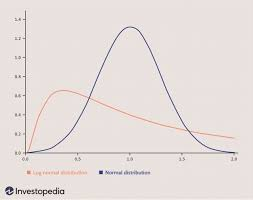</li>
            <br>
            <li>As a first attempt, one can use historical sales data to create an estimate of the order size conditional on an order occurring.</li>
            <br>
        </ul>
        <li><p style="text-align:center">Summary Statistics of Product Sales Data</p>
        <table border="1" class="dataframe">
  <thead>
    <tr style="text-align:right">
      <th></th>
      <th>Product 1</th>
      <th>Product 2</th>
      <th>Product 3</th>
      <th>Product 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Mean (Order Size | Order Received)</th>
      <td>103.5</td>
      <td>648.55</td>
      <td>201.68</td>
      <td>150.07</td>
    </tr>
    <tr>
      <th>Std Dev (Order Size | Order Received)</th>
      <td>37.32</td>
      <td>26.45</td>
      <td>31.08</td>
      <td>3.22</td>
    </tr>
    <tr>
      <th>Probability of Order Received</th>
      <td>0.76</td>
      <td>1.00</td>
      <td>0.70</td>
      <td>0.24</td>
    </tr>
    <tr>
      <th>Expected Demand During Lead Time (Average Order Size)</th>
      <td>705</td>
      <td>3891.31</td>
      <td>2265.84</td>
      <td>784.79</td>
    </tr>
    <tr>
      <th>Expected Std Dev of Demand During Lead Time (Variation of Order Size)</th>
      <td>165.01</td>
      <td>64.78</td>
      <td>383.33</td>
      <td>299.72</td>
    </tr>
  </tbody>
</table></li>
<br>
    </ul>
</font>

$\square$

### <a href="https://en.wikipedia.org/wiki/Mixture_distribution">Example: Mixture Distribution</a>
<br>
<font size="+1">
    <ul>
        <li>A mixture distribution is one that is formed from a weighted average of other distributions, where the weights must sum to one.</li>
        <br>
        <li><img src="https://learn.bionicturtle.com/images/2013/forum/P1.T2.317.Continuous_distributions_002.png"></li>
        <br>
        <li><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Gaussian-mixture-example.svg/800px-Gaussian-mixture-example.svg.png" width="400"></li>
        <br>
    </ul>
    <font color="red"><li style="color:red">Another way we can think of mixture distributions is by randomly sampling from a bag of distributions.</li></font>
    <br>
</font>

$\square$

<Axes: title={'center': 'Simulated Histogram of Product 1 Demand'}, ylabel='Frequency'>

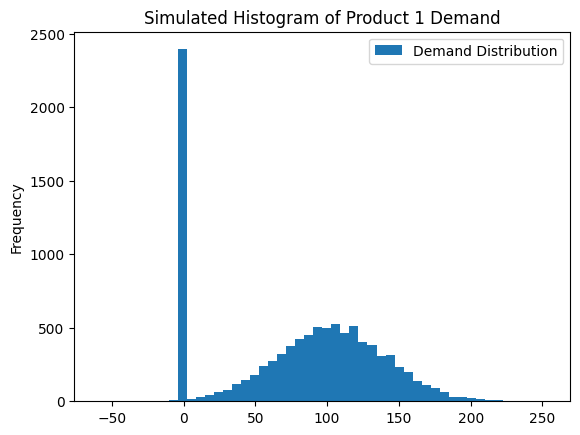

In [ ]:
# Simulating Product 1
rng = np.random.default_rng(seed=42)

simulated_demand = []
for customers in range(10_000):
    daily_order = rng.choice(['No Orders', 'Orders'], p=[0.24, 0.76])

    if daily_order == 'No Orders':
        simulated_demand.append(0)
    else:
        simulated_demand.append(rng.normal(103.5, 37.32))

simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Distribution'])

simulated_demand.plot(kind='hist', bins=50, title='Simulated Histogram of Product 1 Demand')

<Axes: title={'center': 'Simulated Histogram of Product 2 Demand'}, ylabel='Frequency'>

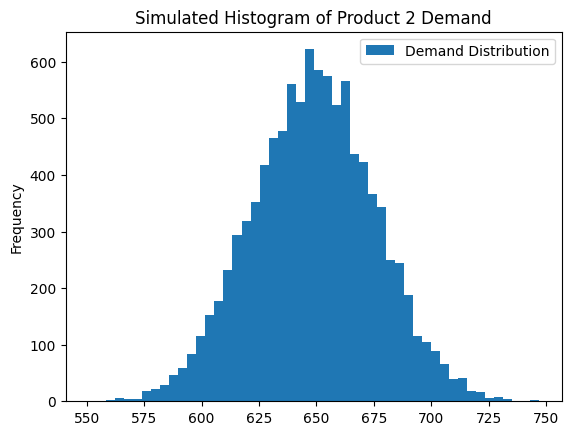

In [ ]:
# Simulating Product 2
rrng = np.random.default_rng(seed=42)

simulated_demand = []
for customers in range(10_000):
    daily_order = rng.choice(['No Orders', 'Orders'], p=[0, 1])

    if daily_order == 'No Orders':
        simulated_demand.append(0)
    else:
        simulated_demand.append(rng.normal(648.55, 26.45))

simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Distribution'])

simulated_demand.plot(kind='hist', bins=50, title='Simulated Histogram of Product 2 Demand')

In [ ]:
# Simulating Any Product

def normal_mixture_simulation(mean, std_dev, prob_of_order, product_num, num_of_simulations):
    rng = np.random.default_rng(seed=42)

    simulated_demand = []
    for customers in range(num_of_simulations):
        daily_order = rng.choice(['No Orders', 'Orders'], p=[1-prob_of_order, prob_of_order])

        if daily_order == 'No Orders':
            simulated_demand.append(0)
        else:
            simulated_demand.append(rng.normal(mean, std_dev))

    simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Distribution'])
    simulated_demand.plot(kind='hist', bins=50, title=f'Simulated Histogram of Product {product_num} Demand')
    return simulated_demand

,Demand Distribution
0,169.357294
1,230.912751
2,0.000000
3,205.653280
4,201.157820
...,...
9995,186.054090
9996,174.315813
9997,0.000000
9998,213.192201


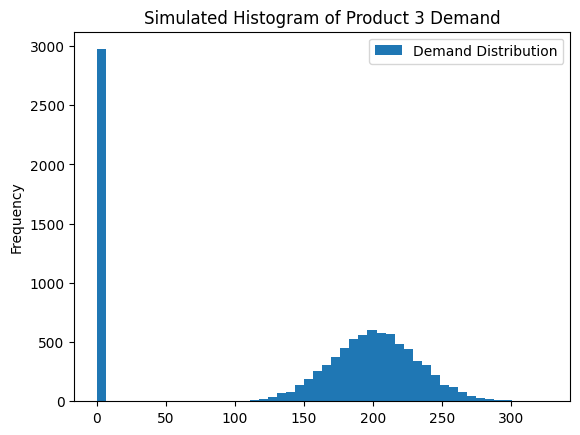

In [ ]:
# Simulating Product 3
normal_mixture_simulation(201.68, 31.08, 0.7, 3, 10_000)

,Demand Distribution
0,146.721251
1,153.098618
2,0.000000
3,150.481646
4,150.015900
...,...
9995,0.000000
9996,0.000000
9997,0.000000
9998,0.000000


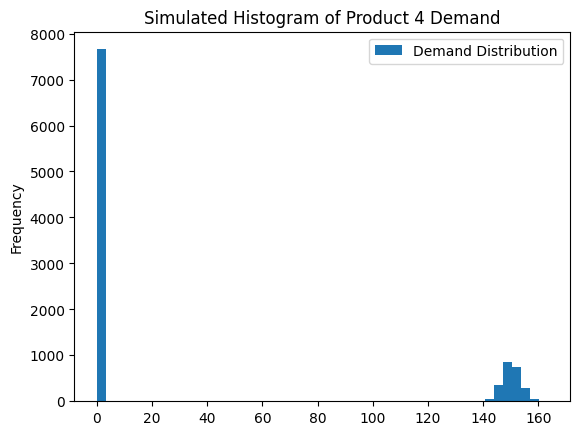

In [ ]:
# Simulating Product 4
normal_mixture_simulation(150.07, 3.22, 0.24, 4, 10_000)

<br>
<font size="+1">
    <ul>
        <li>Note some of the demand is negative, which isn't supposed to happen.</li>
        <br>
    <font color="red"><li style="color:red">One way to keep random numbers positive is to exponentiate them since $$e^x > 0.$$ This leads to the notion of a lognormal random variable $$Y = e^{\mathcal{N}(\mu, \sigma^2)}.$$</li></font>
    <br>
    </ul>
</font>

$\square$

### <a href="https://en.wikipedia.org/wiki/Autocorrelation">Example: Serial Correlation</a>
<br>
<font size="+1">
    <ul>
        <li>Serial correlation, or autocorrelation, is the similarity between observations as a function of the time lag between them.</li>
        <br>
        <ul>
            <li><img src="https://pages.mtu.edu/~suits/AutocorrOboeSound.gif" width="400"></li>
            <br>
            <li><img src="https://slideplayer.com/slide/4283449/14/images/5/Positive+Autocorrelation.jpg" width="400"> <img src="https://slideplayer.com/slide/4283449/14/images/6/Negative+Autocorrelation.jpg" width="400"> <img src="https://slideplayer.com/slide/4283449/14/images/4/No+Autocorrelation.jpg" width="400"></li>
            <br>
            <li><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Acf_new.svg/300px-Acf_new.svg.png" width="400"></li>
                <br>
            <li><img src="https://image2.slideserve.com/3742362/negative-autocorrelation-l.jpg" width="600"></li>
            <br>
        </ul>
        <li>Assume demand is positively serially correlated.</li>
        <br>
        <ul>
          <li>i.e. tomorrow's value is likely to be directly related to today's value.</li>
          <br>
        </ul>
        <li>That is, if yesterday had sufficiently high demand, then it is more likely that tomorrow will also be a higher demand.</li>
        <br>
        <li>A high demand day follows a normal distribution with mean $150$ and standard deviation of $70$.</li>
        <br>
        <li>A low demand day follows a normal distribution with mean $50$ and standard deviation of $15$.</li>
        <br>
        <li>Specifically, assume your sample starts on a high demand day and you subsequently simulate demand for $365$ days, where tomorrow's demand is from a high demand day if today's demand is bigger than $70$, otherwise it will be a low demand day.</li>
        <br>
    </ul>
</font>

$\square$

<Axes: >

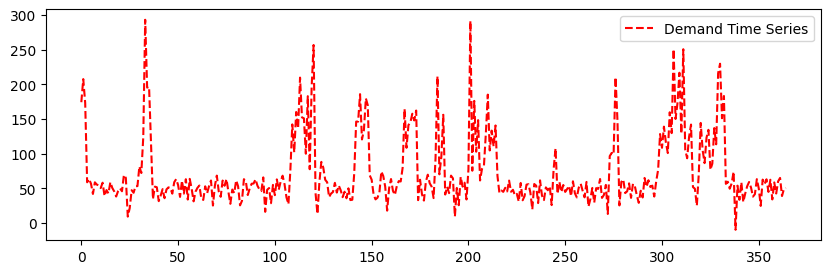

In [ ]:
rng = np.random.default_rng(seed=1)

simulated_demand = [rng.normal(150, 70)]

for t in range(1, 365):
    if simulated_demand[t-1] > 70:
        simulated_demand.append(rng.normal(150, 70))
    else:
        simulated_demand.append(rng.normal(50, 15))

simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Time Series'])
simulated_demand.plot(style='r--', figsize=(10,3))

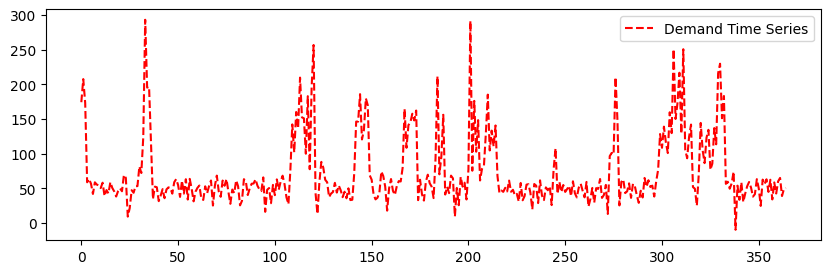

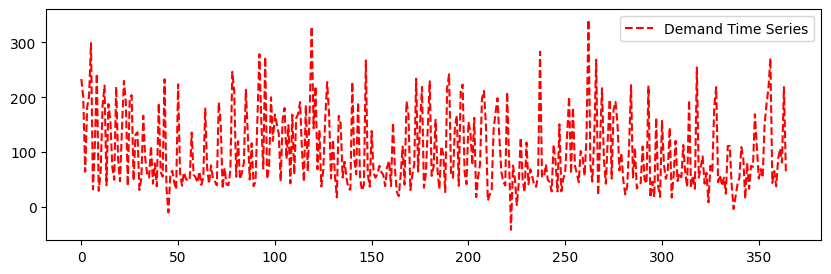

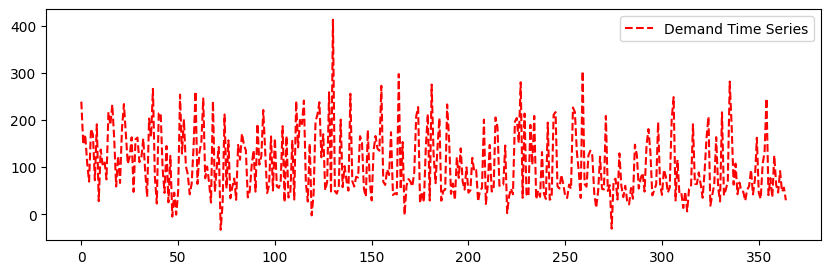

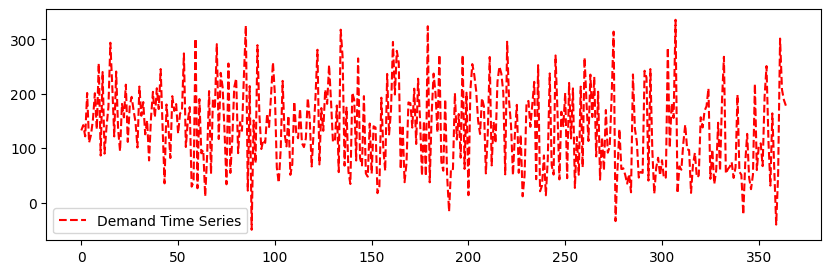

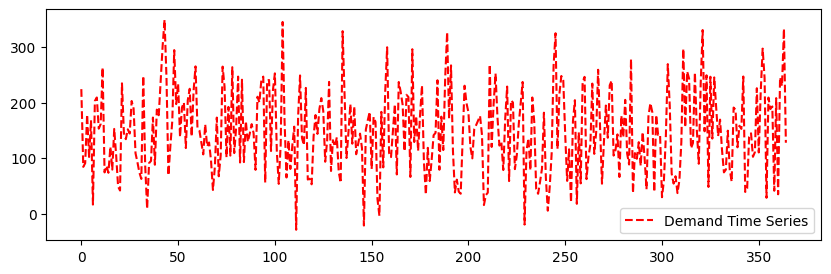

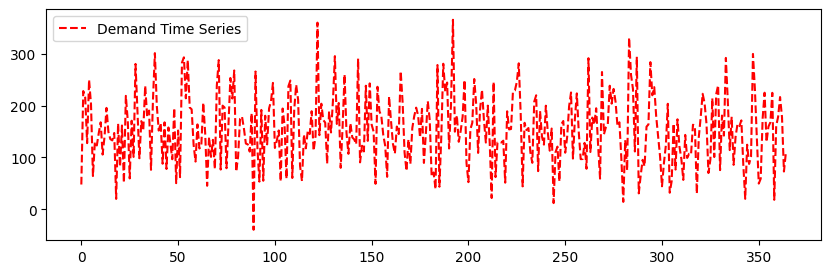

In [ ]:
# Adapt code for an arbitrary horizon for the serial correlation
rng = np.random.default_rng(seed=1)

horizons = [1, 7, 30, 90, 190, 365]

for tau in horizons:
    simulated_demand = [rng.normal(150, 70) for j in range(tau)]
    for t in range(tau, 365):
        if simulated_demand[t-tau] > 70:
            simulated_demand.append(rng.normal(150, 70))
        else:
            simulated_demand.append(rng.normal(50, 15))

    simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Time Series'])
    simulated_demand.plot(style='r--', figsize=(10,3))

### Lognormal Conditional Distribution
<br>
<font size="+1">
    <ul>
        <li>When simulating with normal distributions, <b>demand can be negative</b>, which isn't supposed to happen for an inventory level (unless we're allowing back-order inventory).</li>
        <br>
        <font color="red"><li style="color:red">One way to keep random numbers positive is to exponentiate them since $$e^x > 0.$$ This leads to the notion of a lognormal random variable $$e^{\mathcal{N}(\mu, \sigma^2)}.$$</li></font>
        <br>
        <li>One thing we must be aware of when estimating the parameters for a lognormal distribution is the mean and standard deviation of the normal in the exponent are estimated by taking the <b>log of the demand</b>.</li>
        <br>
        <li>That is, $$\log(\text{Demand}) = \mathcal{N}(\mu, \sigma^2).$$</li>
        <br>
        <li>This implies the following data should be used for our simulation of demand. Note we only need the first three rows at this point.<br>
            <p style="text-align:center">Summary Statistics of Product log-Sales Data</p>
        <table border="1" class="dataframe">
  <thead>
    <tr style="text-align:right">
      <th></th>
      <th>Product 1</th>
      <th>Product 2</th>
      <th>Product 3</th>
      <th>Product 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Mean (log-Order Size | Order Received)</th>
      <td>4.56</td>
      <td>6.47</td>
      <td>5.29</td>
      <td>5.01</td>
    </tr>
    <tr>
      <th>Std Dev (log-Order Size | Order Received)</th>
      <td>0.44</td>
      <td>0.04</td>
      <td>0.16</td>
      <td>0.02</td>
    </tr>
    <tr>
      <th>Probability of Order Received</th>
      <td>0.76</td>
      <td>1.00</td>
      <td>0.70</td>
      <td>0.24</td>
    </tr>
    <tr>
      <th>Expected Demand During Lead Time (Average Order Size)</th>
      <td>705</td>
      <td>3891.31</td>
      <td>2265.84</td>
      <td>784.79</td>
    </tr>
    <tr>
      <th>Expected Std Dev of Demand During Lead Time (Variation of Order Size)</th>
      <td>165.01</td>
      <td>64.78</td>
      <td>383.33</td>
      <td>299.72</td>
    </tr>
  </tbody>
</table></li>
<br>    
        <li>The code for this lognormal demand simulation turns out to follow the same algorithm as a mixture distribution.</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
# Average log daily order size conditional on an order being placed

np.log(product_demand_history[product_demand_history>0]).mean()

1    4.559988
2    6.473907
3    5.294200
4    5.010865
dtype: float64

In [ ]:
# Standard Deviation of log daily order size conditional on an order being placed

np.log(product_demand_history[product_demand_history>0]).std()

1    0.435689
2    0.040982
3    0.160664
4    0.021585
dtype: float64

In [ ]:
# # Average and std dev of unconditional demand during lead times

# print(9*product_demand_history[1].mean(),'\t', np.sqrt(9)*product_demand_history[1].std())

# print(6*product_demand_history[2].mean(),'\t', np.sqrt(6)*product_demand_history[2].std())

# print(16*product_demand_history[3].mean(),'\t', np.sqrt(16)*product_demand_history[3].std())

# print(22*product_demand_history[4].mean(),'\t', np.sqrt(22)*product_demand_history[4].std())

In [ ]:
# Simulating the demand from a lognormal mixture distribution

def lognormal_mixture_simulation(mean, std_dev, prob_of_order, product_num, num_of_simulations):
    rng = np.random.default_rng(seed=42)

    simulated_demand = []
    for customers in range(num_of_simulations):
        daily_order = rng.choice(['No Orders', 'Orders'], p=[1-prob_of_order, prob_of_order])

        if daily_order == 'No Orders':
            simulated_demand.append(0)
        else:
            simulated_demand.append(np.exp(rng.normal(mean, std_dev)))

    simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Distribution'])
    simulated_demand.plot(kind='hist', bins=50, title=f'Simulated Histogram of Product {product_num} Demand')
    return simulated_demand

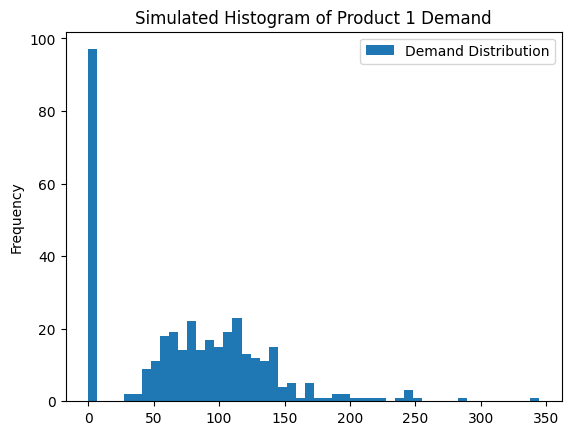

In [ ]:
simulated_demand_product_1 = lognormal_mixture_simulation(mean=4.56,
                                                          std_dev=0.44,
                                                          prob_of_order=0.76,
                                                          product_num=1,
                                                          num_of_simulations=365)

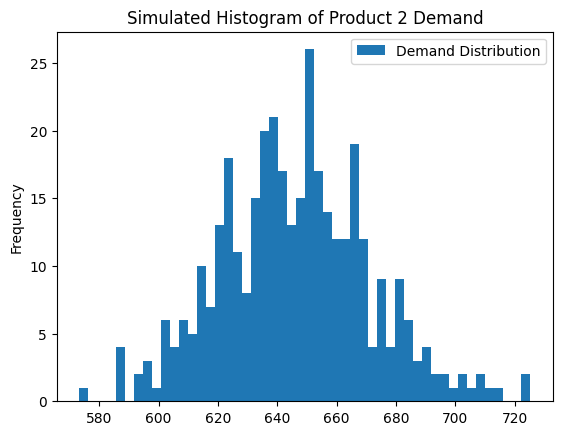

In [ ]:
simulated_demand_product_2 = lognormal_mixture_simulation(mean=6.47,
                                                          std_dev=0.04,
                                                          prob_of_order=1.0,
                                                          product_num=2,
                                                          num_of_simulations=365)

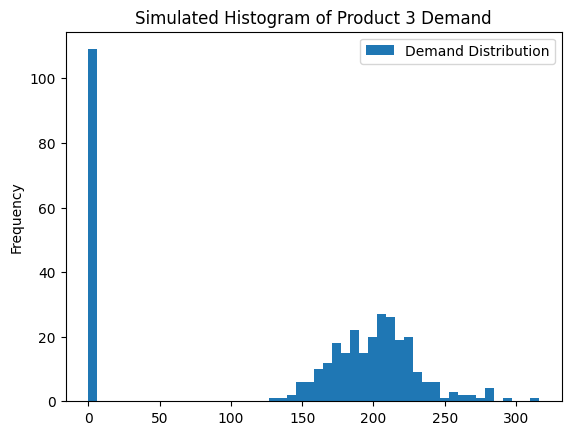

In [ ]:
simulated_demand_product_3 = lognormal_mixture_simulation(mean=5.29,
                                                          std_dev=0.16,
                                                          prob_of_order=0.7,
                                                          product_num=3,
                                                          num_of_simulations=365)

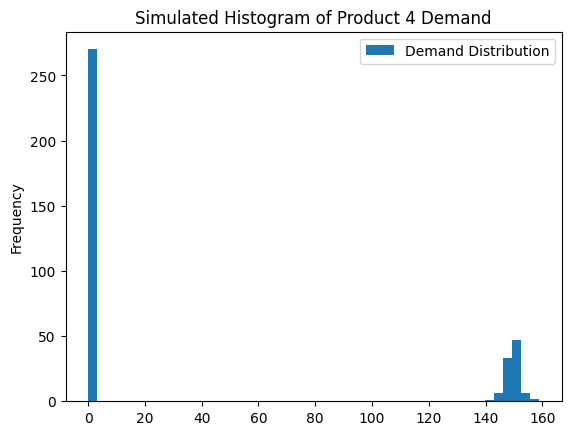

In [ ]:
simulated_demand_product_4 = lognormal_mixture_simulation(mean=5.01,
                                                          std_dev=0.02,
                                                          prob_of_order=0.24,
                                                          product_num=4,
                                                          num_of_simulations=365)

## Expected Annual Profit
<br>
<font size="+1">
    <ul>
        <li>The final step we need to complete is to model the objective function that we are hoping to optimize.</li>
        <br>
        <li>That is, how can we calculate expected profit?</li>
        <br>
        <li>Once we know what the objective function is, we can investigate how it behaves for different inventory management policies and find the policy that maximizes expected profit.</li>
        <br>
        <li>As a starting point, we know for every product $i \in \{1, 2, 3, 4\}$, $$\text{Annual Profit}_i = \text{Total Revenue }_i - \text{Total Costs }_i.$$</li>
        <br>
        <ul>
            <li>We know $$\text{Total Revenue }_i = \text{Selling Price}_i \times \text{Total Units Sold}_i,$$ and $$\text{Total Units Sold}_i = \sum_{t=1}^{365} \text{Daily Units Sold}_{i, t}.$$</li>
            <br>
            <li>Daily units sold will depend on the restocking policy and the random demand.</li>
            <br>
            <li>We also know costs can be decomposed into product costs, ordering costs, and holding costs.</li>
            <br>
            <ul>
                <li>Product Costs equals the total number of orders times the purchase cost.</li>
                <br>
                <li>Ordering Costs equals the total number of times an order was placed times the ordering cost.</li>
                <br>
                <li>Holding Costs equals (can be approximated by) the size of the product times the average inventory level times the cost of holding per unit size (which is $20$ for all products).</li>
                <br>
            </ul>
            <li>That is, $$\text{Total Costs }_i = \sum_{t=1}^{365}\left[ \text{Product Costs}_{i, t} + \text{Ordering Costs}_{i, t} + \text{Holding Costs}_{i, t}\right]$$
        </ul>
        <li>Recall, <br>
            <p style="text-align:center">Product Data</p>
            <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Product</th>
      <th>Lead Time (days)</th>
      <th>Volume ($m^3$)</th>
      <th>Purchase Cost ($\$$)</th>
      <th>Selling Price ($\$$)</th>
      <th>Initial Inventory ($Q$)</th>
      <th>Operating Cost ($\$$)</th>
      <th>Holding Cost ($\$$)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>9</td>
      <td>0.57</td>
      <td>12</td>
      <td>16.1</td>
      <td>2750</td>
      <td>1000</td>
      <td>20</td>
    </tr>
    <tr>
      <th>2</th>
      <td>6</td>
      <td>0.052</td>
      <td>7</td>
      <td>8.6</td>
      <td>22500</td>
      <td>1200</td>
      <td>20</td>
    </tr>
    <tr>
      <th>3</th>
      <td>16</td>
      <td>0.53</td>
      <td>6</td>
      <td>10.2</td>
      <td>5200</td>
      <td>1000</td>
      <td>20</td>
    </tr>
    <tr>
      <th>4</th>
      <td>22</td>
      <td>1.05</td>
      <td>37</td>
      <td>68</td>
      <td>1400</td>
      <td>1000</td>
      <td>20</td>
    </tr>
  </tbody>
</table></li>
        <br>
        <br>
        <li>Finally, subtracting the total costs from the total revenue yields the total annual profit,
        <font size="+0">$$\text{Annual Profit}_i =$$ $$\text{Selling Price}_i \times \sum_{t=1}^{365} \text{Daily Units Sold}_{i, t} - \sum_{t=1}^{365}\left[ \text{Product Costs}_{i, t} + \text{Ordering Costs}_{i, t} + \text{Holding Costs}_{i, t}\right].$$</font></li>
        <br>
    </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

## Inventory Review Policies
<br>
<font size="+1">
    <ul>
        <li>Now that we know how to simulate demand from different distributions and calculate our objective function, we can go a step further and consider the outcomes from using different inventory management review policies.</li>
        <br>
        <font color="red"><li style="color:red">The following simulation is on the more advanced side, and so we won't go through the code step by step, but rather see what can be done with more intricate simulations.</li></font>
        <br>
    </ul>
</font>

### Periodic Inventory Review Policies
<br>
<font size="+1">
    <ul>
        <li>In a periodic review system, the inventory is checked and restocking is done only at specific points in time.</li>
        <br>
        <li>For example, inventory can be checked on a weekly, biweekly, monthly, or some other periodic schedule.</li>
        <br>
        <li>When a firm handles multiple products, the periodic review system offers an advantage of requiring that orders for several items be placed at the predetermined review period.</li>
        <br>
        <li>With this type of inventory system, the shipping and receiving of orders for multiple products are easily coordinated.</li>
        <br>
        <li>In continuous review systems, also known as (fixed order-quantity, variable reorder-point) systems, the reorder points for various products can be encountered at substantially different points in time, making coordination of orders for multiple products more difficult.</li>
        <br>
        <li><img src="https://miro.medium.com/max/700/1*WuT8jVJvrnnCY6GwNxrVQw.png"></li>
        <br>
        <li>In the periodic review policy, the stock is replenished after a certain time period, and is dependent upon the review period, the maximal level of inventory (i.e. order-up-to quantity), and the lead time.</li>
        <br>
    </ul>
</font>

$\square$

<img src="https://www.researchgate.net/profile/Gamze-Oezel-Kadilar/publication/290441536/figure/fig2/AS:318134092353537@1452860486954/Sample-path-of-standard-Brownian-motion-process.png">

In [ ]:
# Simulating the demand from a lognormal mixture distribution

def lognormal_mixture_simulation(mean, std_dev, prob_of_order, num_of_simulations):
    simulated_demand = []
    for customers in range(num_of_simulations):
        daily_order = rng.choice(['No Orders', 'Orders'], p=[1-prob_of_order, prob_of_order])

        if daily_order == 'No Orders':
            simulated_demand.append(0)
        else:
            simulated_demand.append(np.exp(rng.normal(mean, std_dev)))

#     simulated_demand = pd.DataFrame(simulated_demand, columns=['Demand Distribution'])
#     simulated_demand.plot(kind='hist', bins=50, title=f'Simulated Histogram of Product {product_num} Demand')
    return simulated_demand

In [ ]:
# Simulating an inventory for 1 year


def annual_inventory_simulation(order_up_to_level, review_period,
                                product_starting_stock, product_mean, product_sd,
                                product_lead_time, product_probability, product_lead_time_demand):

    inventory = product_starting_stock
    mean = product_mean
    sd = product_sd
    lead_time = product_lead_time
    probability = product_probability
    demand_lead = product_lead_time_demand

    # how much quantity we need to order
    q = 0
    # set the threshold for a running out of stock
    stock_out = 0
    # set the count for the number of days between a review period and the order being delivered
    # i.e. counter of days between order placed and order delivered,
    # which isn't in general zero because of a lead time
    counter = 0
    # initialize the order placed flag to false
    order_placed = False
    # dictionary to store all the information related to the inventory simulation dynamics
    data = {'inv_level': [], 'daily_demand': [], 'units_sold': [], 'units_lost': [], 'orders': []}

    # loop through each day in a year
    for day in range(1, 365):
        # simulate the demand for that day
        day_demand = lognormal_mixture_simulation(mean=mean,
                                                  std_dev=sd,
                                                  prob_of_order=probability,
                                                  num_of_simulations=1)[0]
        #import pdb; pdb.set_trace()
        data['daily_demand'].append(day_demand)

        # If the day is a multiple of review period then you look at your inventory
        # and decide how much you want to order
        # Then set order_placed to True and update the orders data
        if day % review_period == 0:
            # Placing the order of quantity q
            q = order_up_to_level - inventory + demand_lead
            order_placed = True
            data['orders'].append(q)

        # Once the order is placed, increment the count which is the wait time until the order arrives
        if order_placed == True:
            counter += 1
        # once the counter hits the lead time, that is, the time it takes for inventory to arrive
        if counter == lead_time:
            # On the day our order arrives, we update the inventory by the quantity we ordered
            inventory += q
            # Reset the order placed status as False
            order_placed = False
            # reset the counter of days between order placed and order delivered to zero
            counter = 0

        # update units sold for the particular day
        # this update will depend on if there is enough inventory in stock to satisfy the day's demand
        if inventory >= day_demand:
            data['units_sold'].append(day_demand)
            inventory -= day_demand
        elif inventory < day_demand:
            data['units_sold'].append(inventory)
            data['units_lost'].append(day_demand - inventory)
            inventory = 0
            stock_out += 1

        # update the inventory level for the particular day
        data['inv_level'].append(inventory)

    return data


In [ ]:
def calculate_annual_profit(data,
                            product_unit_cost, product_selling_price, product_holding_cost,
                            product_ordering_cost, product_size):

    # parameters specified from the input
    unit_cost = product_unit_cost
    selling_price = product_selling_price
    holding_cost = product_holding_cost
    order_cost = product_ordering_cost
    size = product_size
    days = 365

    ### Calculate various statistics based on the data collected during our simulation

    total_revenue = sum(data['units_sold']) * selling_price
    # product costs
    total_product_cost = sum(data['orders']) * unit_cost
    # ordering costs
    total_ordering_cost = len(data['orders']) * order_cost
    # holding costs
    total_holding_cost = (sum(data['inv_level'])/days) * holding_cost * size

    annual_profit = total_revenue - total_product_cost - total_ordering_cost - total_holding_cost

    return annual_profit

In [ ]:
# Product information
product_starting_stock = 2750
product_mean = 4.56 # log mean
product_sd = 0.44 # log std
product_lead_time = 9
product_probability = 0.76
product_lead_time_demand = 705
product_unit_cost = 12
product_selling_price =16.1
product_holding_cost = 20
product_ordering_cost = 1000
product_size = 0.57

# Max inventory level
order_up_to_level = 3000

<img src="https://www.researchgate.net/publication/331042222/figure/fig1/AS:732857949499394@1551738359232/An-example-simulation-of-a-single-path.jpg" width="500">

<img src="https://cdn.corporatefinanceinstitute.com/assets/stochastic-modeling1-1024x629.png" width="500" height="500">

In [ ]:
# Simulating multiple annual inventory simulations
# Many different paths to get a single average behavior

def repeat_inventory_simulation(order_up_to_level, review_period, num_simulations,
                                product_starting_stock,
                                product_mean,
                                product_sd,
                                product_lead_time,
                                product_probability,
                                product_lead_time_demand,
                                product_unit_cost,
                                product_selling_price,
                                product_holding_cost,
                                product_ordering_cost,
                                product_size):

    profit_list = []
    orders_lost_list = []
    for sim in range(num_simulations):
        # Create data from an annual inventory dynamics simulation
        data = annual_inventory_simulation(order_up_to_level, review_period,
                                product_starting_stock, product_mean, product_sd,
                                product_lead_time, product_probability, product_lead_time_demand)
        # Calculating the profit
        profit = calculate_annual_profit(data,
                            product_unit_cost, product_selling_price, product_holding_cost,
                            product_ordering_cost, product_size)

        profit_list.append(profit)
        # Calculating the orders lost
        total_demand = sum(data['daily_demand'])
        unsold_orders = sum(data['units_lost'])
        # defining orders lost to be the ratio of unsold orders relative to total demand
        orders_lost_list.append(unsold_orders/total_demand)

    return profit_list, orders_lost_list

[79258.18967283067, 5589.861131500016]


<ipython-input-77-396c5127e5d8>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_list, kde=False)


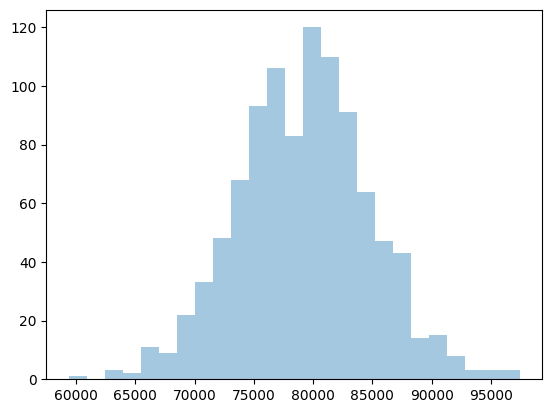

In [ ]:
import seaborn as sns

# profit list
# orders lost list
p_list, o_list = repeat_inventory_simulation(order_up_to_level=3000, review_period=30, num_simulations=1000,
                                product_starting_stock = 2750,
                                product_mean = 4.56,
                                product_sd = 0.44,
                                product_lead_time = 9,
                                product_probability = 0.76,
                                product_lead_time_demand = 705,
                                product_unit_cost = 12,
                                product_selling_price =16.1,
                                product_holding_cost = 20,
                                product_ordering_cost = 1000,
                                product_size = 0.57)

# Plot simulated annual profits for 1,000 simulations

print([np.mean(p_list), np.std(p_list)])
sns.distplot(p_list, kde=False)
plt.show()

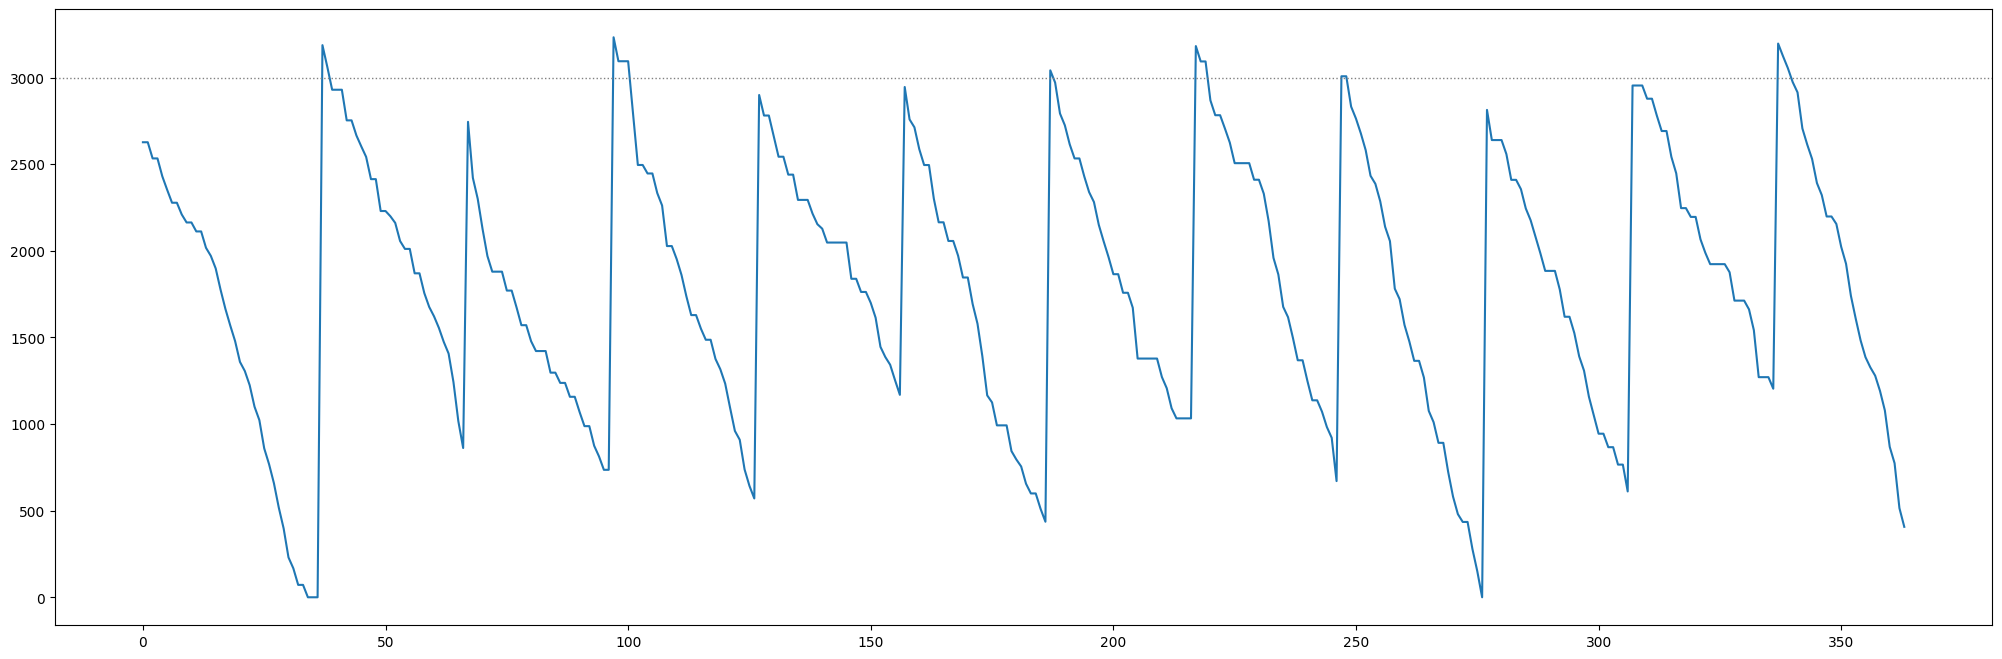

In [ ]:
# Resulting inventory process from a single simulation

data = annual_inventory_simulation(order_up_to_level=3000, review_period=30,
                                product_starting_stock = 2750,
                                product_mean = 4.56,
                                product_sd = 0.44,
                                product_lead_time = 9,
                                product_probability = 0.76,
                                product_lead_time_demand = 705)
plt.figure(figsize=(25,8))
plt.plot(data['inv_level'])
plt.axhline(3000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [ ]:
def periodic_review(low, high, step, review_period,
                    product_starting_stock,
                    product_mean,
                    product_sd,
                    product_lead_time,
                    product_probability,
                    product_lead_time_demand,
                    product_unit_cost,
                    product_selling_price,
                    product_holding_cost,
                    product_ordering_cost,
                    product_size):

    # range of stock maximums
    # M = replenish-up-to or fill-to level
    m_range = [i for i in range(low, high, step)]
    review_dict = {}

    # for every replenishment level
    # evaluate the profit list and orders lost list
    # for a sequence of simulations
    for M in m_range:
        # profit list, orders lost list
        p_list, o_list = repeat_inventory_simulation(order_up_to_level=M, num_simulations=100,
                                                     review_period=review_period,
                                product_starting_stock=product_starting_stock,
                                product_mean=product_mean,
                                product_sd=product_sd,
                                product_lead_time=product_lead_time,
                                product_probability=product_probability,
                                product_lead_time_demand=product_lead_time_demand,
                                product_unit_cost=product_unit_cost,
                                product_selling_price=product_selling_price,
                                product_holding_cost=product_holding_cost,
                                product_ordering_cost=product_ordering_cost,
                                product_size=product_size)

        # review dictionary is updated for various summary statistics about the
        # profit list and the orders lost list
        review_dict[M] = (np.mean(p_list), np.quantile(p_list, 0.05), np.quantile(p_list, 0.95), np.std(p_list),
                          np.mean(o_list))

    return review_dict

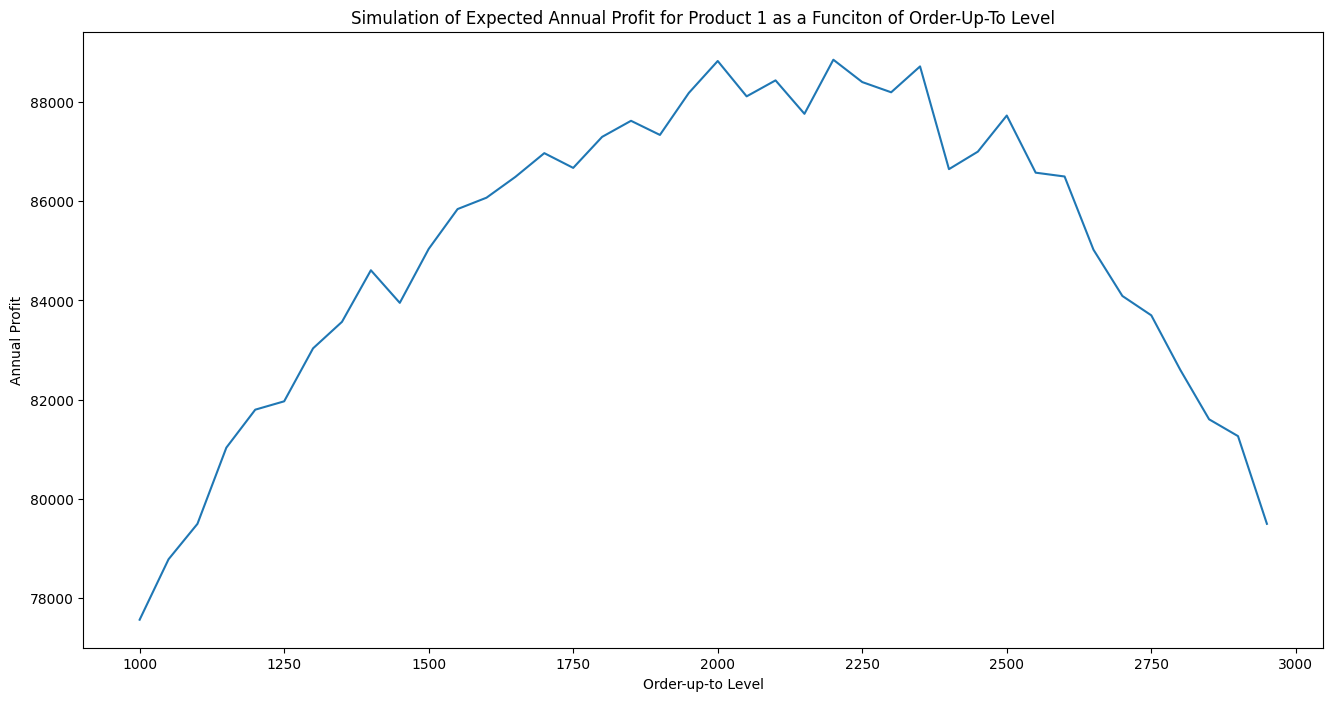

In [ ]:
review = periodic_review(low=1000, high=3000, step=50, review_period=30,
                        product_starting_stock = 2750,
                                product_mean = 4.56,
                                product_sd = 0.44,
                                product_lead_time = 9,
                                product_probability = 0.76,
                                product_lead_time_demand = 705,
                                product_unit_cost = 12,
                                product_selling_price =16.1,
                                product_holding_cost = 20,
                                product_ordering_cost = 1000,
                                product_size = 0.57)

xx = [i for i in review.keys()]
yy = []
for val in review.values():
    yy.append(val[0])


plt.figure(figsize=(16,8))
plt.plot(xx, yy)
plt.title('Simulation of Expected Annual Profit for Product 1 as a Funciton of Order-Up-To Level')
plt.xlabel('Order-up-to Level')
plt.ylabel('Annual Profit')
plt.show()